In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the parameters of the model
B = 1000  # Borrowed amount
SC = 300  # Cost of skirmish for Claimant
SD = 300  # Cost of skirmish for Debtor
CC = 5000  # Cost of clash for Claimant

# Calculating P lower bar W (PW_bar), the threshold for a potential clash regime
PW_bar = CC / (B - SC + CC)

# Creating a range of PW values from 0 to 1
PW_values = np.linspace(0, 1, 100)

# Calculating the probability of a clash (Ψ) for each PW value
Psi_values = [(1 - PW) * (B / (B + SD)) if PW_bar <= PW < 1 else 0 for PW in PW_values]

# Calculating maximum probability of a clash (Psi_max)
# This is the highest probability of a clash occurring under the given parameters
Psi_max = (1 - PW_bar) * (B / (B + SD))

PW_bar, Psi_max

(0.8771929824561403, 0.09446693657219978)

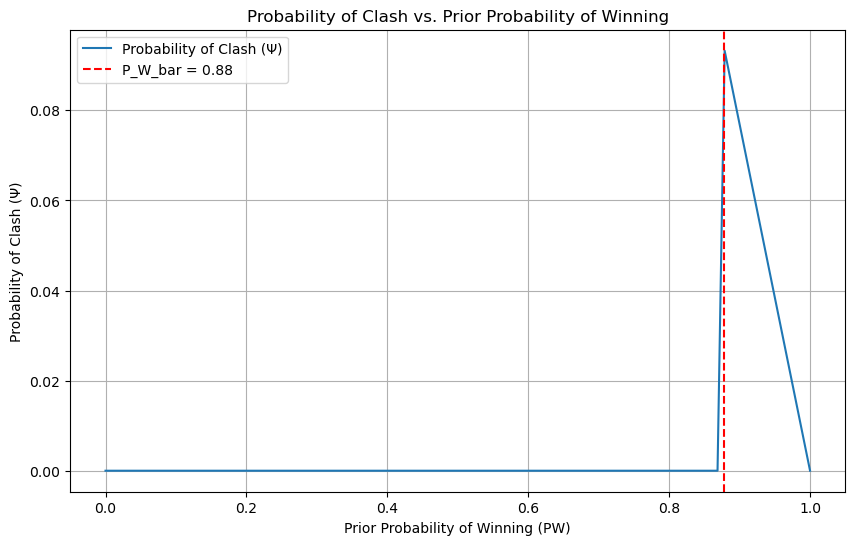

In [12]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(PW_values, Psi_values, label='Probability of Clash (Ψ)')
plt.axvline(x=PW_bar, color='red', linestyle='--', label=f'P_W_bar = {PW_bar:.2f}')
plt.xlabel('Prior Probability of Winning (PW)')
plt.ylabel('Probability of Clash (Ψ)')
plt.title('Probability of Clash vs. Prior Probability of Winning')
plt.legend()
plt.grid(True)
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


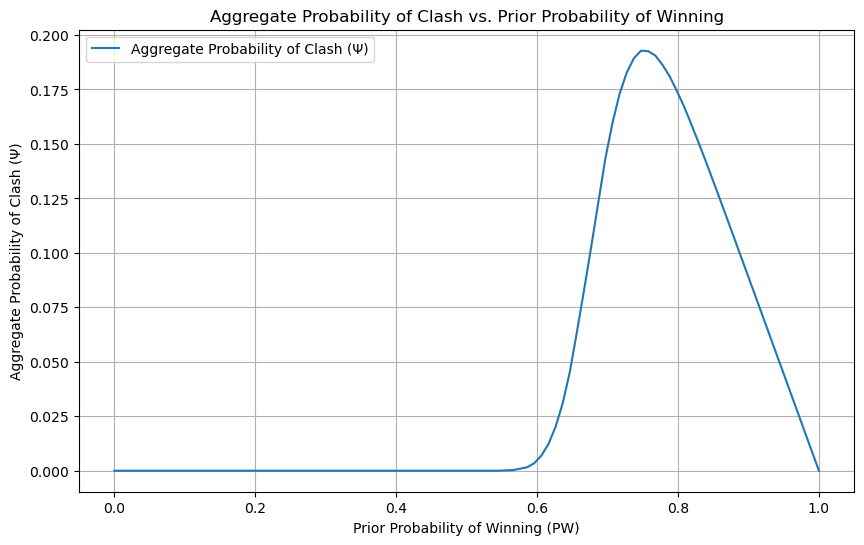

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Set the parameters for the truncated normal distribution
lower, upper = 0, 5000
mu, sigma = 2500, 500 # Mean and standard deviation
N = 10000 # Number of samples, smaller number for a first try

# Generate the truncated normal distribution of B
B_values = truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(N)

# Parameters for the model
SC = 300  # Cost of skirmish for Claimant
SD = 300  # Cost of skirmish for Debtor
CC = 5000  # Cost of clash for Claimant

# Calculate probabilities of a clash for each B
def calculate_clash_probability(B, SC, SD, CC, PW_values):
    PW_bar = CC / (B - SC + CC) if B > SC else 0
    # Calculate Ψ (probability of a clash) for each PW
    Psi_values = np.where(
        PW_values >= PW_bar,
        (1 - PW_values) * (B / (B + SD)),
        0
    )
    return Psi_values

# Define a range of PW values from 0 to 1
PW_values = np.linspace(0, 1, 100)

# Aggregate the probabilities
aggregate_Psi = np.zeros_like(PW_values)
for B in B_values:
    Psi_values = calculate_clash_probability(B, SC, SD, CC, PW_values)
    aggregate_Psi += Psi_values

# Average the probabilities
aggregate_Psi /= N

# Plot the aggregate curve
plt.figure(figsize=(10, 6))
plt.plot(PW_values, aggregate_Psi, label='Aggregate Probability of Clash (Ψ)')
plt.xlabel('Prior Probability of Winning (PW)')
plt.ylabel('Aggregate Probability of Clash (Ψ)')
plt.title('Aggregate Probability of Clash vs. Prior Probability of Winning')
plt.legend()
plt.grid(True)
plt.show()


